<a href="https://colab.research.google.com/github/student-entrepreneur/TSP-GRIP-Data-Science-TASK-5-/blob/main/TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


# **TASK 5 - EXPLORATORY DATA ANALYSIS - SPORTS (INDIAN PREMIER LEAGUE)**


## **AUTHOR - AKSHAYA RAJ S A**

## **INTERN@THE SPARKS FOUNDATION**

---



## **IMPORTING LIBRARY AND LOAD DATASET**

---




In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving deliveries.csv to deliveries (1).csv
Saving matches.csv to matches (1).csv


In [ ]:
import io
sample_match = pd.read_csv(io.BytesIO(uploaded['matches.csv']))
sample_del = pd.read_csv(io.BytesIO(uploaded['deliveries.csv']))
sample_match = sample_match.drop(columns=["umpire3"],axis=1)


In [ ]:
sample_match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [ ]:
sample_del.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN




---



## **EXPLORATORY DATA ANALYSIS**

---



In [ ]:
print(sample_match.info())
print(sample_del.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag



---


# **SEASON ANALYSIS** 





---



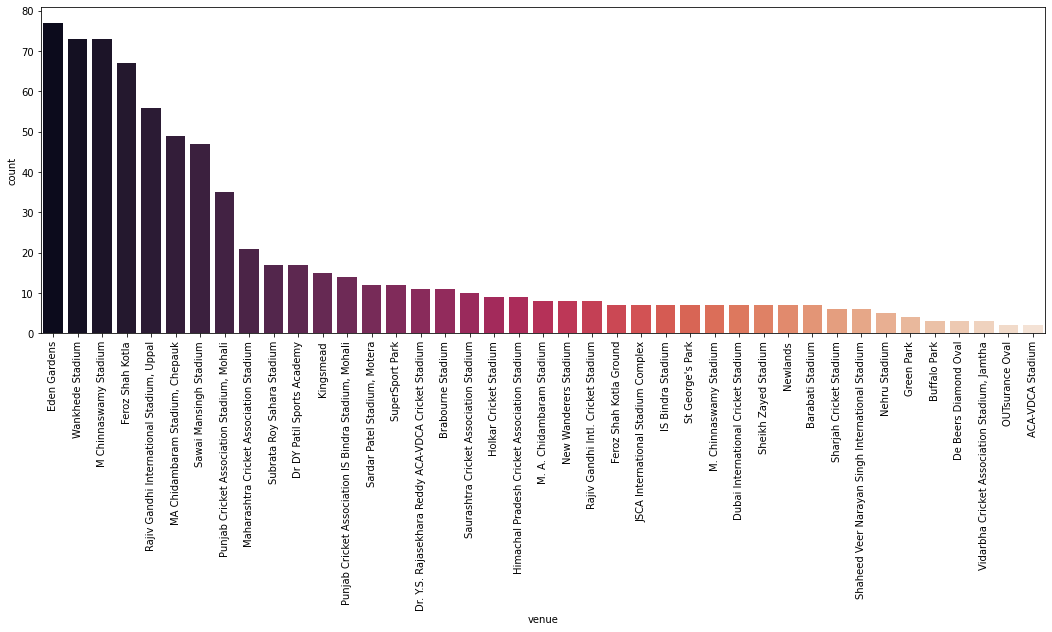

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot(x='venue', data=sample_match,palette="rocket", order = sample_match['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


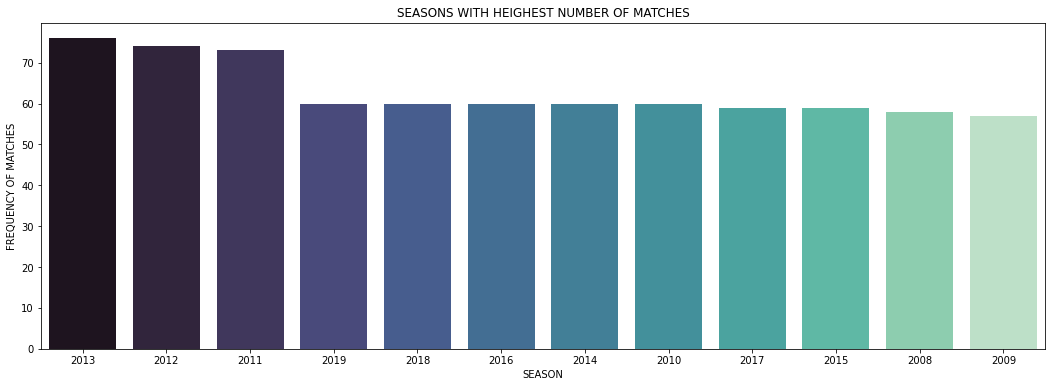

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot('season',data=sample_match,palette="mako",order = sample_match['season'].value_counts().index)
plt.title("SEASONS WITH HEIGHEST NUMBER OF MATCHES")
plt.xlabel("SEASON")
plt.ylabel("FREQUENCY OF MATCHES")
plt.show()

#**OBSERVATION FROM SEASON ANALYSIS**


*   Stadium Eden Garcen is the most chosen stadium for matches and ACA-VDCA Stadium is the least chosen one.
*   The season 2013 has got most number of matches followed by 2012 and 2011 and 2009 has got the least number of matches.





---


# **TEAM ANALYSIS**






---



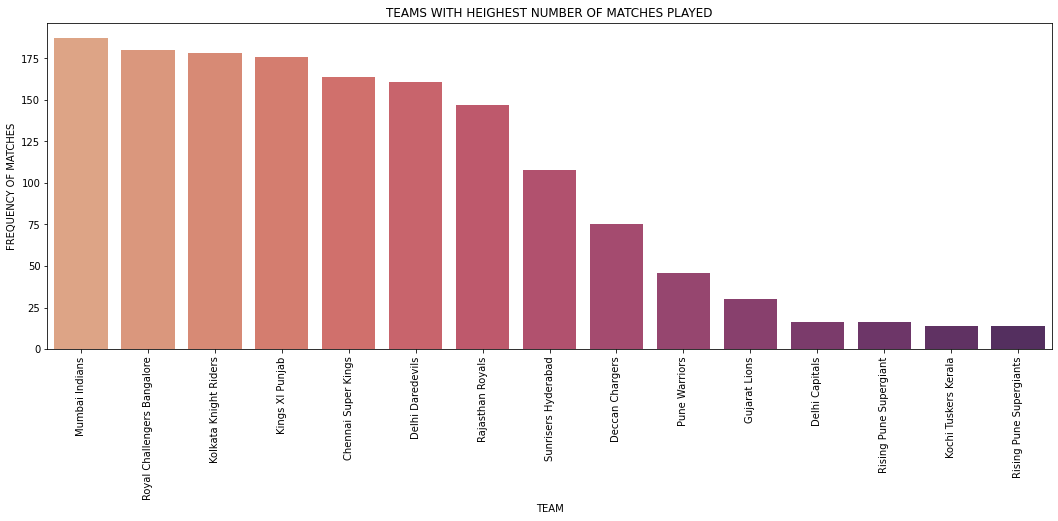

In [ ]:
team_match = pd.melt(sample_match, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize = (18,6))
sns.countplot(x='value', data=team_match, palette="flare", order = team_match['value'].value_counts().index)
plt.title("TEAMS WITH HEIGHEST NUMBER OF MATCHES PLAYED")
plt.xlabel("TEAM")
plt.ylabel("FREQUENCY OF MATCHES")
plt.xticks(rotation=90)
plt.show()

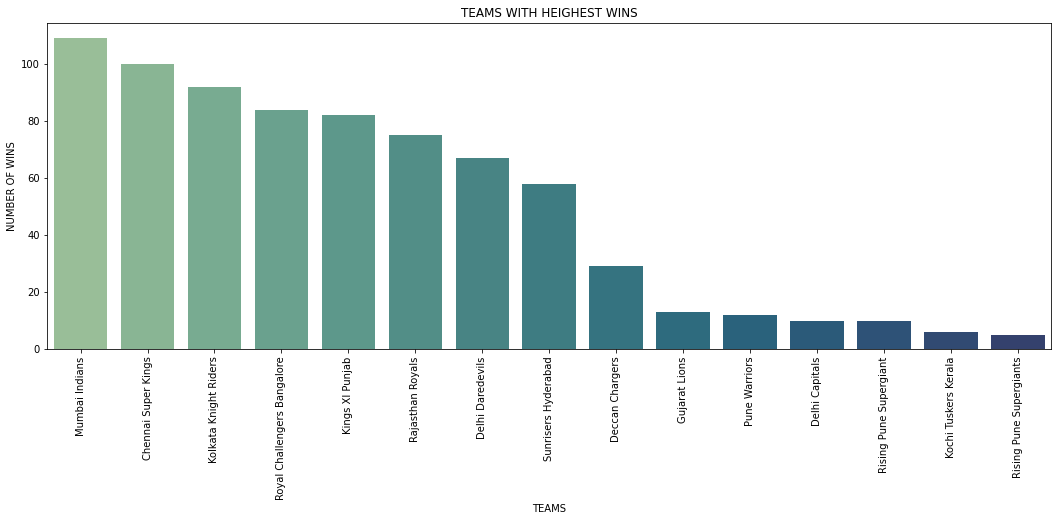

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot(x='winner',data=sample_match, palette='crest', order = sample_match['winner'].value_counts().index)
plt.title("TEAMS WITH HEIGHEST WINS")
plt.xticks(rotation=90)
plt.xlabel("TEAMS")
plt.ylabel("NUMBER OF WINS")
plt.show()

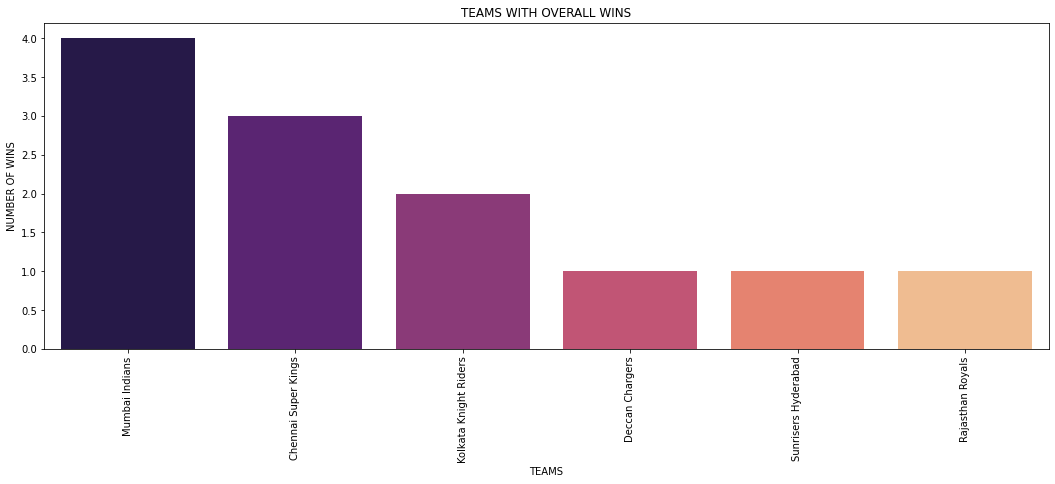

In [ ]:
overall_win=sample_match.drop_duplicates(subset=['season'], keep='last')
plt.figure(figsize = (18,6))
sns.countplot(x='winner',data=overall_win, palette='magma', order = overall_win['winner'].value_counts().index)
plt.title("TEAMS WITH OVERALL WINS")
plt.xticks(rotation=90)
plt.xlabel("TEAMS")
plt.ylabel("NUMBER OF WINS")
plt.show()

# **OBSERVATION FROM TEAM ANALYSIS**


*   Team Mumbai Indians is the team with most number of maches played followed by Royal Challengers Bangalore. The teams like Rising Pune Supergiants, Kochi Tuskers Kerala played least number of matches.
*   Team Mumba Indians has won most matches followed by Chennai Super Kings. The teams Rising Pune Supergiants, Kochi Tuskers Kerala has won least number of matches. Still, these teams are not bad when compared to the number of matches they have played.
*   When analysed as overall win in a season, Mumbai Indians rule the leaderboard by winning four season followed by Chennai Super Kings who have won three seasons





---


# **TOSS ANALYSIS**


---



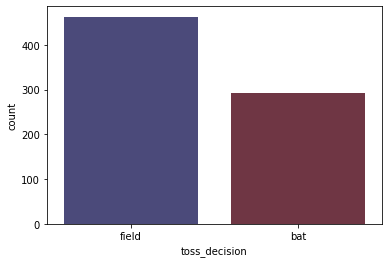

In [ ]:
sns.countplot(x=sample_match["toss_decision"], palette="icefire")

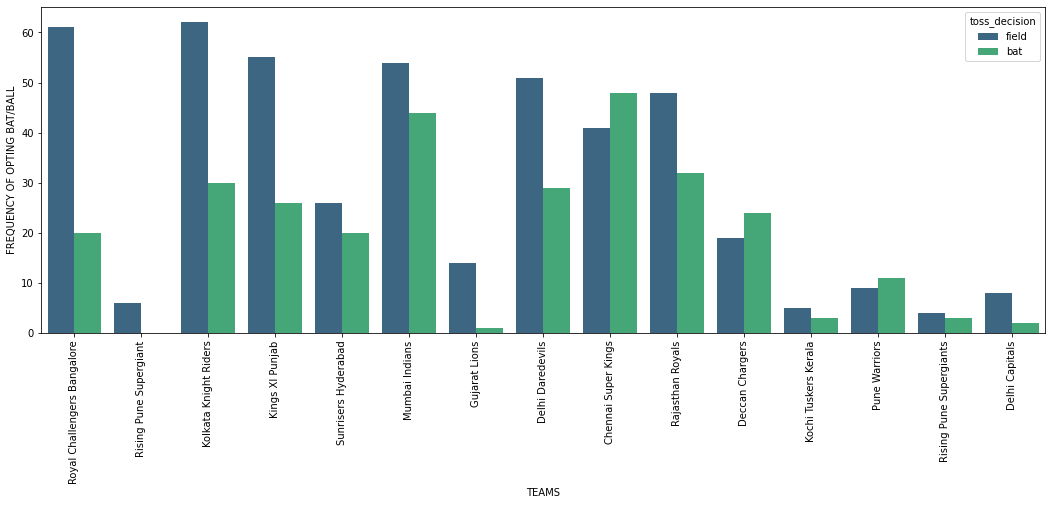

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='toss_winner', hue='toss_decision', data=sample_match, palette="viridis")
plt.xlabel("TEAMS")
plt.ylabel("FREQUENCY OF OPTING BAT/BALL")
plt.xticks(rotation=90)
plt.show()

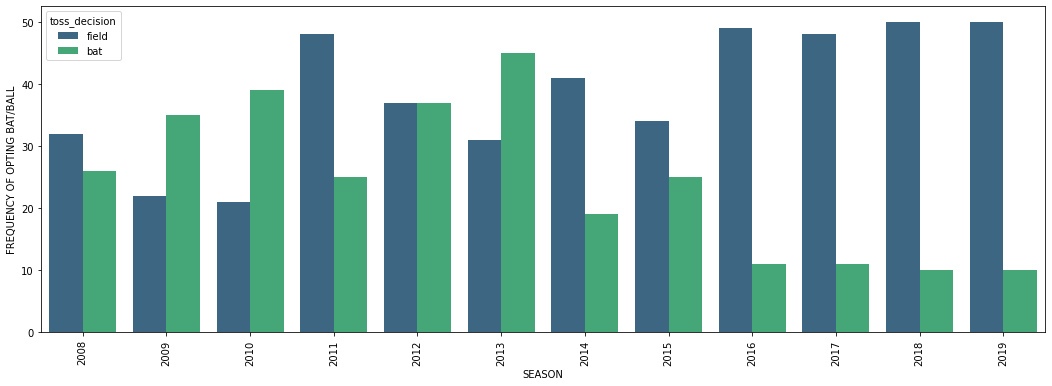

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='season', hue='toss_decision', data=sample_match, palette="viridis")
plt.xlabel("SEASON")
plt.ylabel("FREQUENCY OF OPTING BAT/BALL")
plt.xticks(rotation=90)
plt.show()

# **OBSERVATION FROM TOSS ANALYSIS**


*   Overall probability of a toss winner opting for field is higher than opting for bat.
*   Each team seems to have their startegy of choosing the toss decision. Teams Chennai Super Kings, Deccan Chargers and Pune warriors have chosen bat first more number of times than field first. Other all teams has chosen field first more times.
*   From Season 2014, we see a trend transition of prefering field first same as in 2008 and 2011. In 2012, bat and field where chosen equally.





---


# **HEIGHEST CHOSEN UMPIRES**


---



In [ ]:
sample_umpire = pd.melt(sample_match, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
sample_umpire['value'].unique()

array(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
       nan, 'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan',
       'Chris Gaffaney', 'Rod Tucker', 'Nigel Llong', 'Anil Chaudhary',
       'K Ananthapadmanabhan', 'O Nandan', 'A Nanda Kishore',
       'Vineet Kulkarni', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'Anil Dandekar', 'Yeshwant Barde', 'Ian Gould',
       'Ulhas Gandhe', 'Nan

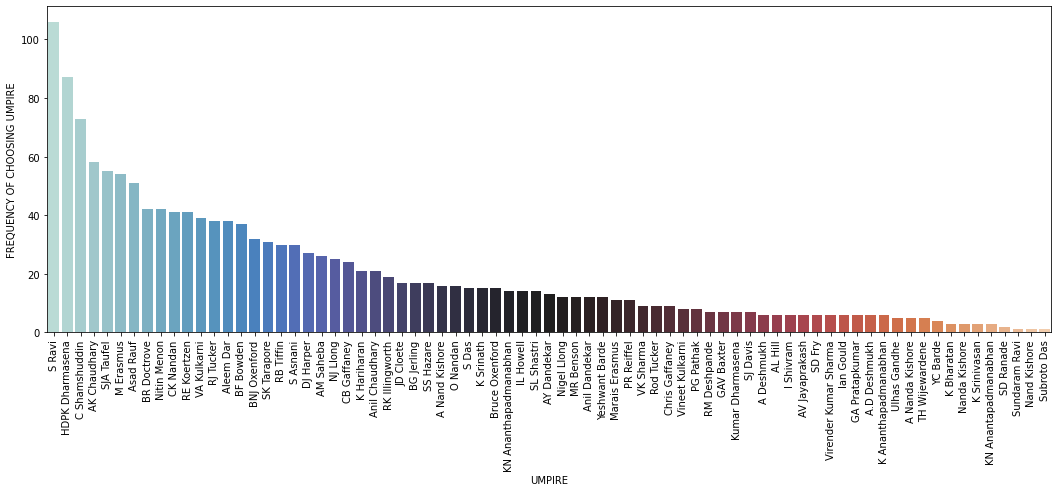

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='value', data=sample_umpire, palette="icefire", order = sample_umpire['value'].value_counts().index)
plt.xlabel("UMPIRE")
plt.ylabel("FREQUENCY OF CHOOSING UMPIRE")
plt.xticks(rotation=90)
plt.show()



---


# **PLAYER OF MATCH**


---



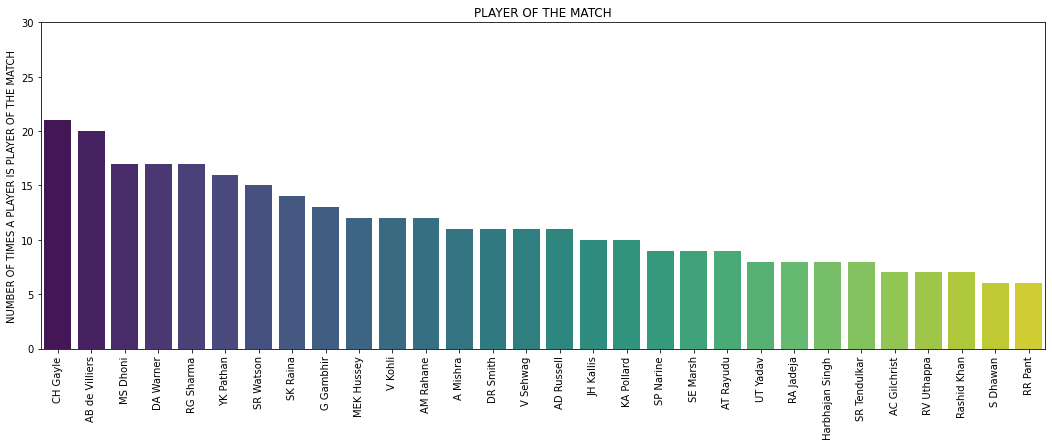

In [ ]:
plt.figure(figsize = (18,6))
plt.ylim([0,30])
plt.title("PLAYER OF THE MATCH")
sns.barplot(x = sample_match["player_of_match"].value_counts()[:30].index, y = sample_match["player_of_match"].value_counts()[:30], palette="viridis")
plt.ylabel("NUMBER OF TIMES A PLAYER IS PLAYER OF THE MATCH")
plt.xticks(rotation=90)
plt.show()

# **OBSERVATION FROM PLAYER OF THE MATCH**


*   CH Gayle is ruling the leaderboard by getting player of the match slightly heigher than AB de Villiers.
*   It is also convincing to see that A Nehra and RR Pant were the player of the match in few matches.






---

# **BATSMAN ANALYSIS**


---



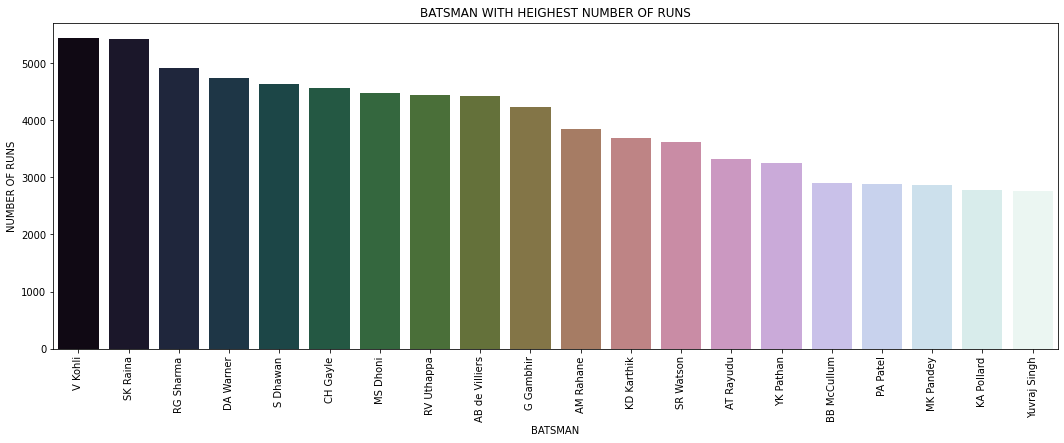

In [ ]:
plt.figure(figsize = (18,6))
high_run = sample_del.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
plt.title("BATSMAN WITH HEIGHEST NUMBER OF RUNS")
sns.barplot(x = high_run["batsman"].iloc[:20], y = high_run["batsman_runs"].iloc[:20], data= high_run, palette="cubehelix")
plt.xlabel("BATSMAN")
plt.ylabel("NUMBER OF RUNS")
plt.xticks(rotation=90)
plt.show()

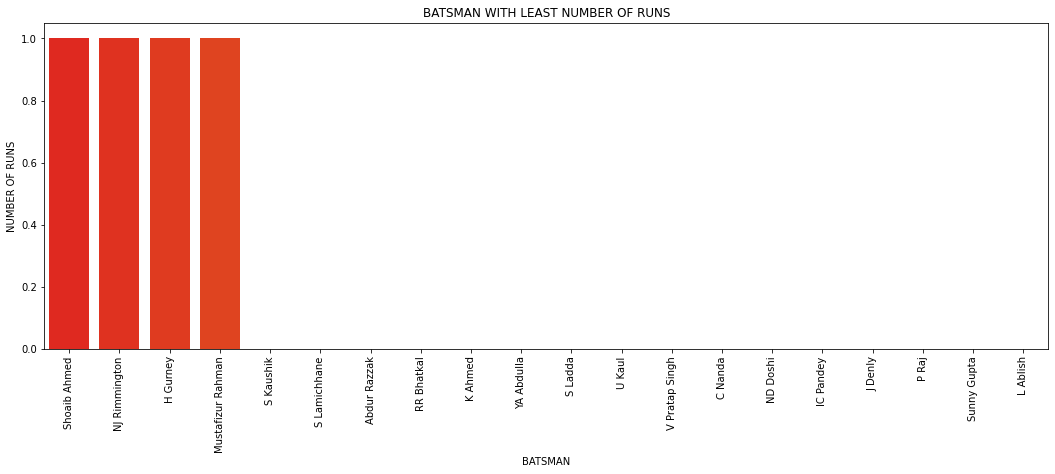

In [ ]:
least_run=high_run.tail(20)
plt.figure(figsize = (18,6))
plt.title("BATSMAN WITH LEAST NUMBER OF RUNS")
sns.barplot(x = least_run["batsman"], y = least_run["batsman_runs"], data= least_run, palette="autumn")
plt.ylabel("NUMBER OF RUNS")
plt.xlabel("BATSMAN")
plt.xticks(rotation=90)
plt.show()

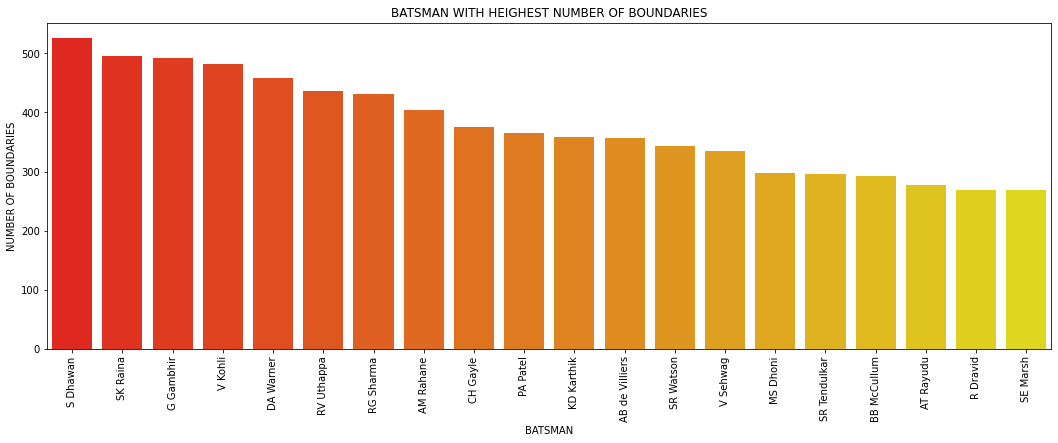

In [ ]:
plt.figure(figsize = (18,6))
high_bound = sample_del.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
plt.title("BATSMAN WITH HEIGHEST NUMBER OF BOUNDARIES")
sns.barplot(x = high_bound["batsman"].iloc[:20], y = high_bound["batsman_runs"].iloc[:20], data= high_bound, palette="autumn")
plt.xlabel("BATSMAN")
plt.ylabel("NUMBER OF BOUNDARIES")
plt.xticks(rotation=90)
plt.show()

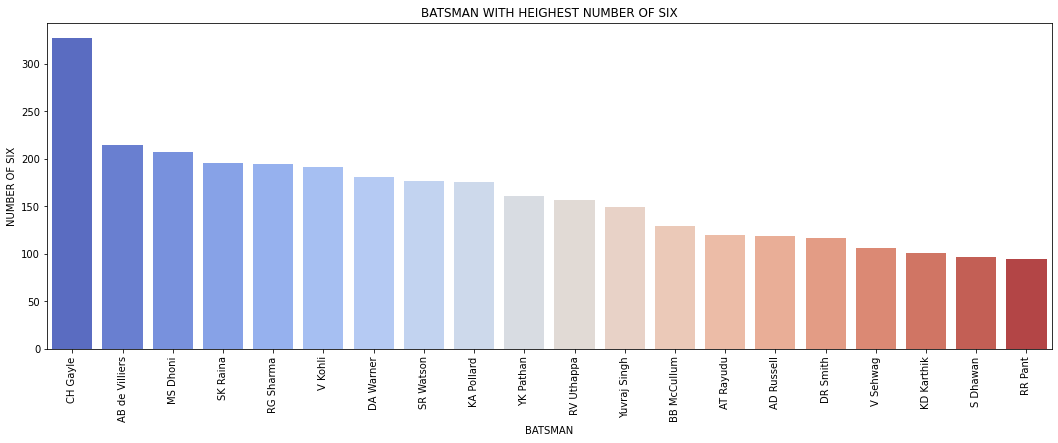

In [ ]:
plt.figure(figsize = (18,6))
high_six = sample_del.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
plt.title("BATSMAN WITH HEIGHEST NUMBER OF SIX")
sns.barplot(x = high_six["batsman"].iloc[:20], y = high_six["batsman_runs"].iloc[:20], data= high_six, palette="coolwarm")
plt.xlabel("BATSMAN")
plt.ylabel("NUMBER OF SIX")
plt.xticks(rotation=90)
plt.show()

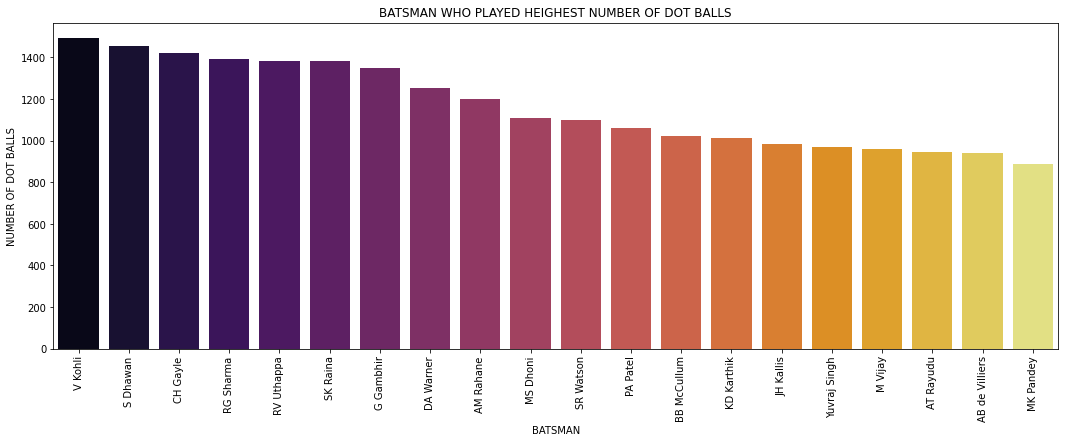

In [ ]:
plt.figure(figsize = (18,6))
high_dot = sample_del.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
plt.title("BATSMAN WHO PLAYED HEIGHEST NUMBER OF DOT BALLS")
sns.barplot(x = high_dot["batsman"].iloc[:20], y = high_dot["batsman_runs"].iloc[:20], data= high_dot, palette="inferno")
plt.xlabel("BATSMAN")
plt.ylabel("NUMBER OF DOT BALLS")
plt.xticks(rotation=90)
plt.show()


# **OBSERVATION FROM BATSMAN ANALYSIS**

*   V Kohli followed by S K Raina has secured most number of runs and nearly 16 batsmen have not scored any run for their team.
*   S Dhawan, S K Raina, G Gambir and V Kohli secure the leaderboard in most number of boundaries.
*   G H Gayle has took his unbeatable first place in hitting most number of six. S Dhawan and R R Pant has scored least number of six among the top 20.
*   V Kohli has batted heighest number of Dot Balls.





---


# **DISMISSAL TYPE ANALYSIS**


---



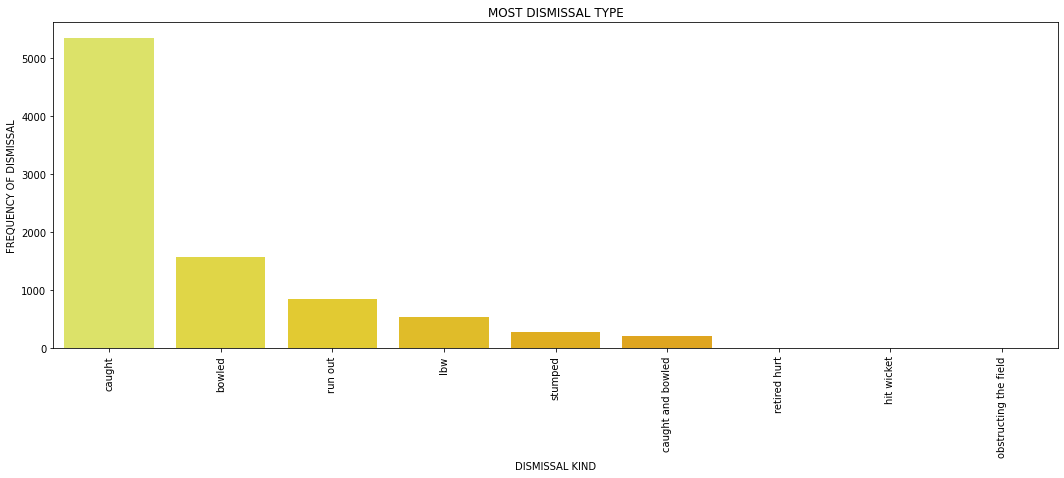

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot(x=sample_del['dismissal_kind'], palette="Wistia", order = sample_del['dismissal_kind'].value_counts().index)
plt.xlabel("DISMISSAL KIND")
plt.ylabel("FREQUENCY OF DISMISSAL")
plt.title("MOST DISMISSAL TYPE")
plt.xticks(rotation='vertical')
plt.show()

**Caught is the most common dismissal type in IPL followed by bowled**



---


# **BOWLERS ANALYSIS**


---



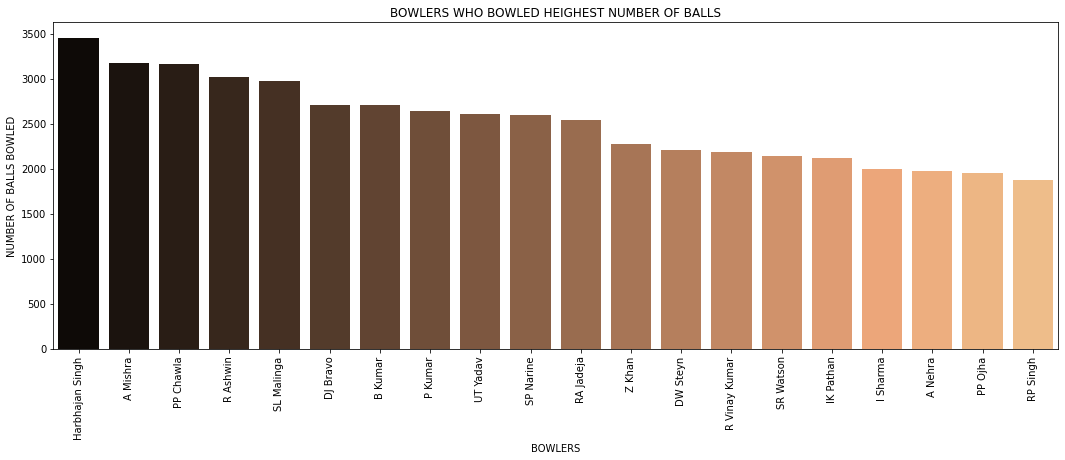

In [ ]:
plt.figure(figsize = (18,6))
high_bowl = sample_del.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
plt.title("BOWLERS WHO BOWLED HEIGHEST NUMBER OF BALLS")
sns.barplot(x = high_bowl["bowler"].iloc[:20], y= high_bowl["ball"].iloc[:20], data= high_bowl, palette="copper")
plt.xlabel("BOWLERS")
plt.ylabel("NUMBER OF BALLS BOWLED")
plt.xticks(rotation=90)
plt.show()

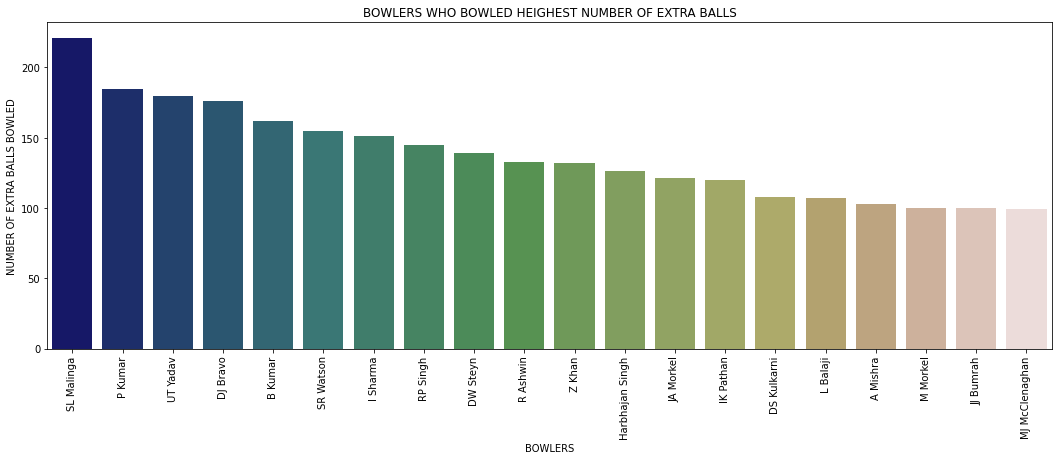

In [ ]:
plt.figure(figsize = (18,6))
high_bowl_extra = sample_del.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
plt.title("BOWLERS WHO BOWLED HEIGHEST NUMBER OF EXTRA BALLS")
sns.barplot(x = high_bowl_extra["bowler"].iloc[:20], y= high_bowl_extra["extra_runs"].iloc[:20], data= high_bowl_extra, palette="gist_earth")
plt.xlabel("BOWLERS")
plt.ylabel("NUMBER OF EXTRA BALLS BOWLED")
plt.xticks(rotation=90)
plt.show()

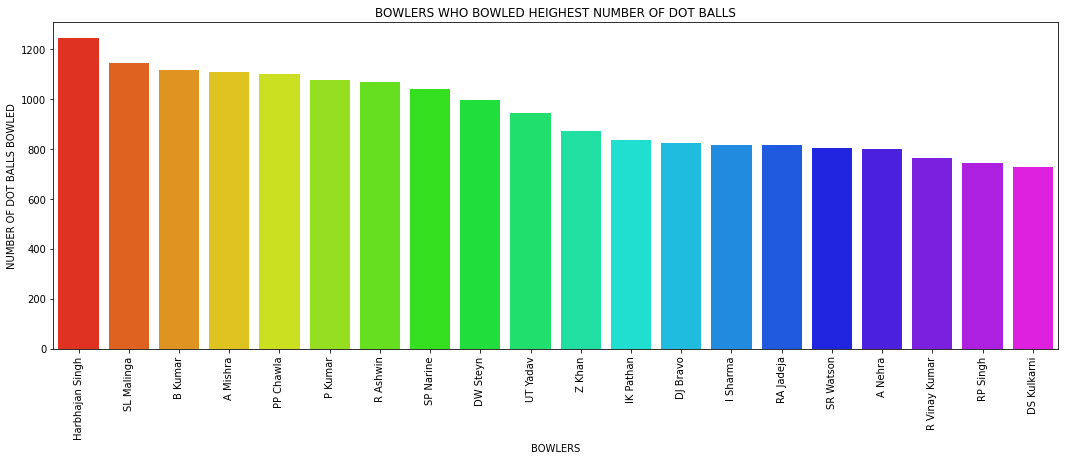

In [ ]:
plt.figure(figsize = (18,6))
high_bowl_dot = sample_del.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
plt.title("BOWLERS WHO BOWLED HEIGHEST NUMBER OF DOT BALLS")
sns.barplot(x = high_bowl_dot["bowler"].iloc[:20], y= high_bowl_dot["total_runs"].iloc[:20], data= high_bowl_dot, palette="gist_rainbow")
plt.xlabel("BOWLERS")
plt.ylabel("NUMBER OF DOT BALLS BOWLED")
plt.xticks(rotation=90)
plt.show()

# **OBSERVATION FROM BOWLERS ANALYSIS**


*   Harbajan Singh has bowled the heighest number of balls in IPL
*   SL Malinga has bowled the heighest number of extra balls in IPL
*   It is not a surprise to see that Harbajan Singh followed by S L Maling has bowled the heighest number of Dot Balls.


